In [7]:
import pandas as pd

In [19]:
time_paths = {
    "SPOT-RNA":"/home/macieka/2d-prediction/SPOT-RNA/time.txt",
    "MXfold":"/home/macieka/2d-prediction/mxfold/predictions/time.txt",
    "MXfold2":"/home/macieka/2d-prediction/mxfold2/time.txt",
    "Contextfold":"/home/macieka/2d-prediction/ContextFold_1_00/tail-time.txt",
    "CONTRAfold":"/home/macieka/2d-prediction/contrafold/predictions/time.txt",
    # "rna-state-inf":"/home/macieka/2d-prediction/rna-state-inf/tail-time.txt",
    "UFold":"/home/macieka/2d-prediction/UFold/tail-time.txt",
    "E2efold":"/home/macieka/2d-prediction/e2efold/e2efold_productive/time.txt"    
}

In [20]:
method_times = {}
for n, tf in time_paths.items():
    with open(tf) as f:
        times = f.readlines()[-3:-2]
    method_times[n]=times[0]
print(method_times)

{'SPOT-RNA': 'real\t19m52.341s\n', 'MXfold': 'real\t2m44.149s\n', 'MXfold2': 'real\t126m12.052s\n', 'Contextfold': 'real\t29m21.005s\n', 'CONTRAfold': 'real\t2m29.984s\n', 'UFold': 'real\t18m8.379s\n', 'E2efold': 'real\t2m36.520s\n'}


In [40]:
import numpy as np
sec_times = []
for m, v in method_times.items():
    t_val = v.replace("real\t", "").strip()
    t_val = t_val.split("m")
    t_val[0] = int(t_val[0])
    t_val[1] = float(t_val[1].replace('s',''))
    sec_time = float(t_val[0]*60 + t_val[1])
    sec_times.append([m, sec_time])
    print(m, sec_time)
sec_times = np.array(sec_times)

SPOT-RNA 1192.341
MXfold 164.149
MXfold2 7572.052
Contextfold 1761.005
CONTRAfold 149.984
UFold 1088.379
E2efold 156.52


In [54]:
col_name='Time [s]'
df = pd.DataFrame(sec_times[:,1].astype("float16"), index=sec_times[:, 0], columns=[col_name]).sort_values(by=col_name)
df

,Time [s]
CONTRAfold,150.000
E2efold,156.500
MXfold,164.125
UFold,1088.000
SPOT-RNA,1192.000
Contextfold,1761.000
MXfold2,7572.000


[Text(0.5, 1.0, 'Execution time')]

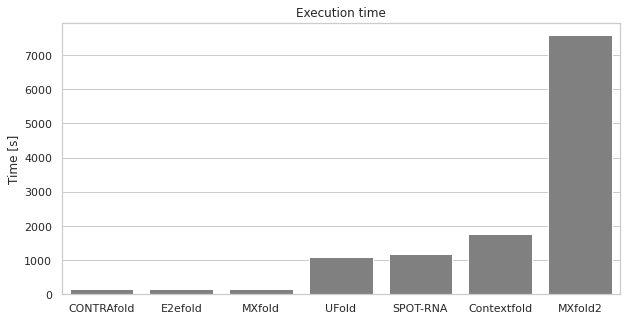

In [57]:
from turtle import width
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x=df.index, y=col_name, data=df, color='grey')
ax.set(title="Execution time")
# ax.yaxis.grid(True)